# Chp. 1 Optimal Parameters
Justin Bois, Ph.D.

Outcomes of measurements follow probability distributions
- defined by the story of how the data came to be

Michaelson's speed of light
- assumed results were normally distributed
    - verified by looking at the PDF
    - and the CDF
        -more effective because there is no binning bias

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
sns.set()

In [5]:
# read in the michelson data
michelson_speed_of_light = pd.read_csv('morley.csv', index_col=0)
michelson_speed_of_light.head()

#Several Experiments, each with 20 "runs" and the corresponding measurement

,Expt,Run,Speed
1,1,1,850
2,1,2,740
3,1,3,900
4,1,4,1070
5,1,5,930


In [6]:
michelson_speed_of_light.describe()

,Expt,Run,Speed
count,100.000000,100.000000,100.000000
mean,3.000000,10.500000,852.400000
std,1.421338,5.795331,79.010548
min,1.000000,1.000000,620.000000
25%,2.000000,5.750000,807.500000
50%,3.000000,10.500000,850.000000
75%,4.000000,15.250000,892.500000
max,5.000000,20.000000,1070.000000


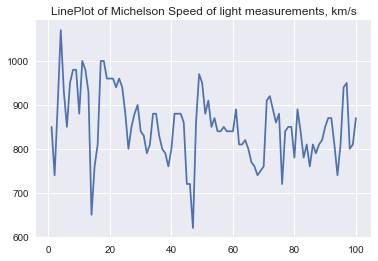

In [7]:
michelson_speed_of_light.Speed.plot(marker = 'x')
plt.title('LinePlot of Michelson Speed of light measurements, km/s')
plt.show()

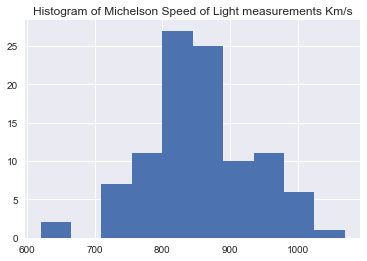

In [8]:
michelson_speed_of_light.Speed.hist()
plt.title('Histogram of Michelson Speed of Light measurements Km/s')
plt.show()

In [9]:
def ecdf(data):
    '''Compute (ECDF) 
    Empirical Cumulative Distribution Function 
    for a one-dimensional array of measurements.'''
    # number of data points
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n #just scaling y ticks from 0-1
    
    return x, y

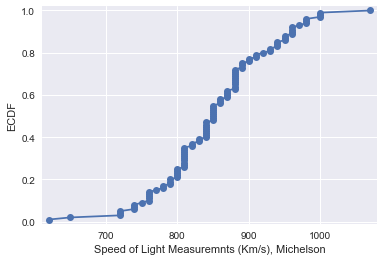

In [10]:
# Compute the ECDF for the county level dem_share of swing states
x, y = ecdf(michelson_speed_of_light.Speed)

# Generate plot
_ = plt.plot(x, y, #linestyle = 'none',
            #alpha = 0.5, markeredgecolor = 'w' ,
            #markeredgewidth = .8,
            marker = 'o')

# set margins
plt.margins(0.02)

# label the axes
_ = plt.xlabel('Speed of Light Measuremnts (Km/s), Michelson')
_ = plt.ylabel('ECDF')

plt.show()

## Checking Normality of Michelson data

In [11]:
#compute mu and sigma of data
mean = np.mean(michelson_speed_of_light.Speed)
std = np.std(michelson_speed_of_light.Speed)

# generate some normally distributed samples with mu and sigma
# THEORETICAL CDF
samples = np.random.normal(mean, std, size = 10000)

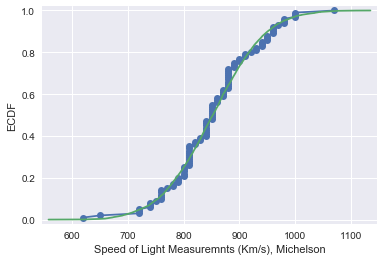

In [12]:
# Overlay the plots to see if the empirical and theoretical distributions align

# plot the epirical data
x, y = ecdf(michelson_speed_of_light.Speed)
_ = plt.plot(x, y, #linestyle = 'none',
            #alpha = 0.5, markeredgecolor = 'w' ,
            #markeredgewidth = .8,
            marker = 'o')
# plot the theoretical data
x, y = ecdf(samples)
_ = plt.plot(x, y, 
            marker = 'x')

# set margins
plt.margins(0.02)

# label the axes
_ = plt.xlabel('Speed of Light Measuremnts (Km/s), Michelson')
_ = plt.ylabel('ECDF')

plt.show()
# the units of the x axis are off, but this is just an excercise, so don't sweat it for now.

## CDF with bad estimate of st. dev. off by 50%

In [13]:
#compute mu and BAD-SIGMA of data
mean = np.mean(michelson_speed_of_light.Speed)
std = np.std(michelson_speed_of_light.Speed)*(1.5)

# generate some normally distributed samples with mu and sigma
# THEORETICAL CDF
samples = np.random.normal(mean, std, size = 10000)

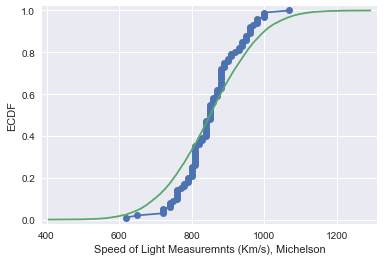

In [14]:
# Overlay the plots to see if the empirical and theoretical distributions align

# plot the epirical data
x, y = ecdf(michelson_speed_of_light.Speed)
_ = plt.plot(x, y, #linestyle = 'none',
            #alpha = 0.5, markeredgecolor = 'w' ,
            #markeredgewidth = .8,
            marker = 'o')
# plot the theoretical data
x, y = ecdf(samples)
_ = plt.plot(x, y, 
            marker = 'x')

# set margins
plt.margins(0.02)

# label the axes
_ = plt.xlabel('Speed of Light Measuremnts (Km/s), Michelson')
_ = plt.ylabel('ECDF')

plt.show()
# the units of the x axis are off, but this is just an excercise, so don't sweat it for now.

## CDF with bad estimate of mean off by just 1%

In [15]:
#compute mu at 99.99% and normal sigma
mean = np.mean(michelson_speed_of_light.Speed)*(1.01)
std = np.std(michelson_speed_of_light.Speed)

# generate some normally distributed samples with mu and sigma
# THEORETICAL CDF
samples = np.random.normal(mean, std, size = 10000)

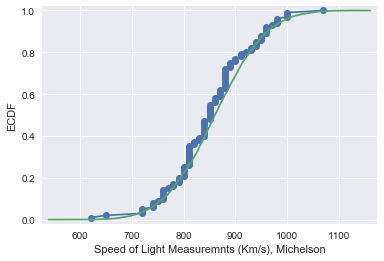

In [16]:
# Overlay the plots to see if the empirical and theoretical distributions align

# plot the epirical data
x, y = ecdf(michelson_speed_of_light.Speed)
_ = plt.plot(x, y, #linestyle = 'none',
            #alpha = 0.5, markeredgecolor = 'w' ,
            #markeredgewidth = .8,
            marker = 'o')
# plot the theoretical data
x, y = ecdf(samples)
_ = plt.plot(x, y, 
            marker = 'x')

# set margins
plt.margins(0.02)

# label the axes
_ = plt.xlabel('Speed of Light Measuremnts (Km/s), Michelson')
_ = plt.ylabel('ECDF')

plt.show()
# the units of the x axis are off, but this is just an excercise, so don't sweat it for now.

## Optimal parameters
- Parameter values that bring the model in closes agreement with the data
- the parameters computed from the data

**But! Optimal parameters with a bad model will still give bad results**

### Packages to do statistical inference
- scipy.stats
- statsmodels
- hacker stats with numpy

## Example: Baseball No-hitters and Poisson process
*Recall: Time between Poisson events is exponentially distribuyted*

- The exponential distribution has a single parameter
    - **tau** : typical interval time.
    - tau for optimal fit = mean interval time where time is in units of number of games between no-hitters

In [17]:
no_hitter_times = [ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467]
no_hitter_times = np.array(no_hitter_times)
type(no_hitter_times)

numpy.ndarray

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


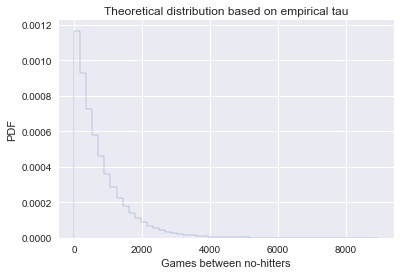

In [18]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(no_hitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')
_ = plt.title('Theoretical distribution based on empirical tau')

# Show the plot
plt.show()


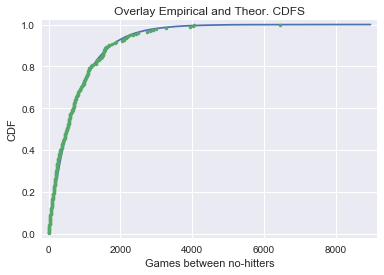

In [19]:
# Create an ECDF from real data: x, y
x, y = ecdf(no_hitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

plt.title('Overlay Empirical and Theor. CDFS')

# Show the plot
plt.show()


### fudge tau to see the effect

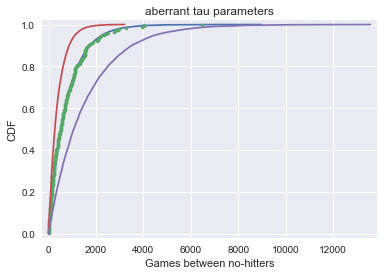

In [20]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.title('aberrant tau parameters')
plt.show()

## Linear regression by least squares
Recall the Pearson Correlation Coefficient
- often time a linear function is appropriate
- parameters:
    - slope
    - intercept

**Optimizing the parameters**
- residual is the delta y between a data point and the regression line

Leas squares with `np.polyfit()`
- computational algorithm to do the number crunching for us


In [21]:
#slope, intercept = np.polyfit(total_votes, dem_share, 1)#1 for degree

In [22]:
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])
fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

In [23]:
#Computing the Pearson correlation coefficient
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between 
    two arrayws."""
    # Compute correlation matrix : corr_mat
    corr_mat = np.corrcoef(x, y)
    # Return entry [0,1]
    return corr_mat[0,1]

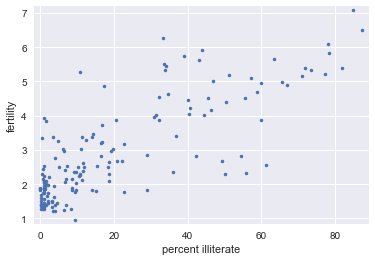

0.8041324026815341


In [24]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


Assume fertility is a linear function of the female literacy rate. That is , f = ai + b

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


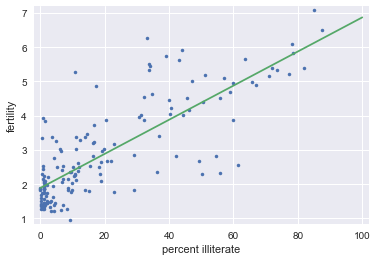

In [25]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1) #degree 1 "polynomial"

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


### Plotting the function that is being optimized
The RSS, versus the slope parameter a

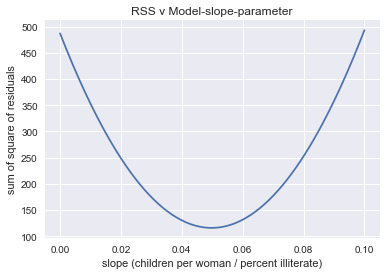

In [26]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.title('RSS v Model-slope-parameter')
plt.show()

#note that the sum of squared residuals is minimized around 0.05

## The importance of EDA: Anscombe's quartet
They all have the same:
- mean x
- mean y
- linear regression
- sum sq residuals

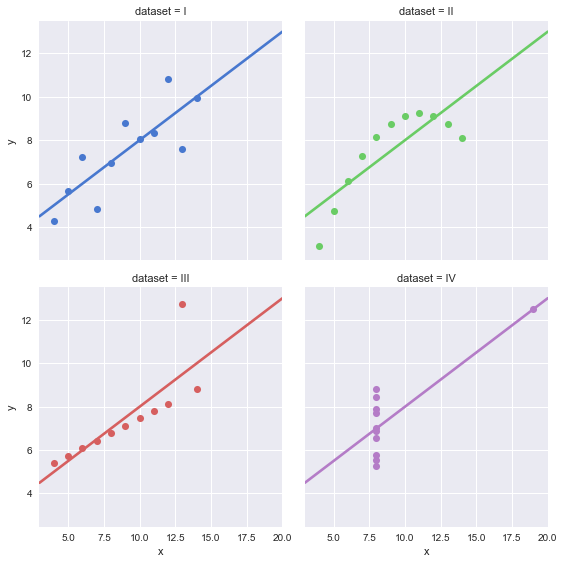

In [27]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

In [28]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
dataset    44 non-null object
x          44 non-null float64
y          44 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [30]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


0.5000909090909095 3.0000909090909076


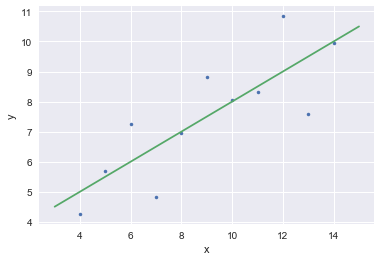

In [31]:
# Perform linear regression: a, b
a, b = np.polyfit(df[df.dataset == 'I'].x, df[df.dataset == 'I'].y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(df[df.dataset == 'I'].x, df[df.dataset == 'I'].y,
             marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


In [33]:
x1 = df[df.dataset == 'I'][['x', 'y']]
x2 = df[df.dataset == 'II'][['x', 'y']]
#x3 = 

In [34]:
# iterate through the datasets
for ds in set(df.dataset):
    # Perform linear regression: a, b
    a, b = np.polyfit(df[df.dataset == ds].x, df[df.dataset == ds].y, 1)

    # Print the result
    print('modeled parameters of dataset:', ds)
    print('slope:', a, 'intercept:', b)
    print('')

modeled parameters of dataset: IV
slope: 0.49990909090909064 intercept: 3.0017272727272735

modeled parameters of dataset: I
slope: 0.5000909090909095 intercept: 3.0000909090909076

modeled parameters of dataset: II
slope: 0.5000000000000004 intercept: 3.000909090909089

modeled parameters of dataset: III
slope: 0.4997272727272731 intercept: 3.0024545454545453



# Chp. 2 Generating bootstrap replicates

Thinking probabilistically
- generalizeability of results
- repeating an experiment may not be possible
*But!* We can simulate getting the data again.
- resample the data we have
- recompute the summary statistic of interest (i.e. the mean)
    - randomly select one measurement
    - randomly select n measurements and store them
        - now we have a resampled array of data
        - compute the summary statistic on the sample and store the result
        - iterate the sampling process repeatedly to simulate getting a new set of measurements
        
## Bootstraping
- use of resampled data to perform statistical inference
- each resampled array of the data is a **bootstrap sample**
    - a boostrap replicate summary statistic is computed from the bootstrap sample
        - note that the max number of unique bootstrap samples possible is n^n (since repeted values ara "allowed") and the max mean = max of the original array. 
            - (in the edge case where you have n repetitions of n.max()
    
Let's try it with the michelson data


In [38]:
# random choice snippet
np.random.choice([1,2,3,4,5], size = 3)

array([4, 2, 2])

In [46]:
michelson_speed_of_light.Speed.describe()

count     100.000000
mean      852.400000
std        79.010548
min       620.000000
25%       807.500000
50%       850.000000
75%       892.500000
max      1070.000000
Name: Speed, dtype: float64

In [43]:
# bootstrap samples from michelson data
bs_sample = np.random.choice(michelson_speed_of_light.Speed, size = 100)

In [44]:
np.mean(bs_sample)

846.2

In [47]:
np.median(bs_sample)

840.0

In [48]:
np.std(bs_sample)

83.18389267159839

In [67]:
# data camp array for set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015
rainfall = [ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ]
print(len(rainfall))

133


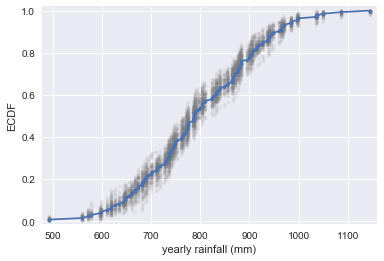

In [52]:
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


## Bootstrap confidence intervals

In [53]:
# bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    '''Generate bootstrap replicate of one-dimensional data.'''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) #return the statistic of interest on the bootstraped replicate

In [54]:
bootstrap_replicate_1d(michelson_speed_of_light.Speed, np.mean)

865.4

## Many bootstrap replicates

In [55]:
# we'll make 10,000 bootstrap replicates

# initialize empty array
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(michelson_speed_of_light.Speed, np.mean)

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


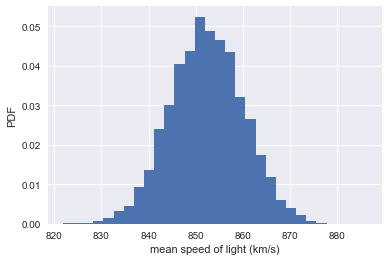

In [56]:
plt.hist(bs_replicates, bins = 30, normed = True) #normed = True sets the height so that the total area of the bars is = 1
# we do it so the histogram approximates a probability density function
# area under the curve being the probability of such a pdf

plt.xlabel('mean speed of light (km/s)')
plt.ylabel('PDF')
plt.show()

We have computed the aprox PDF of the mean speed of light we would expect to get if we performed the measurements again.
Now we're thingking probabilistically
- if we repeated the experiments we would expect to see the mean only vary by the std

### Confidence interval of a statistic
- if we repeated measurements over and over again, *p%* of the observed values would lie within the *p%* confidence interval. 
    - in our case, 95% of the means would lie within the 95% confidence interval
    - by doing bootstrap replicates we just *repeated* the experiment over and over again

In [59]:
conf_int = np.percentile(bs_replicates, [2.4, 97.5])
# 2.5th and 97.5th percentiles to get the 95th confidence interval
    # this means the model is 95% confident the mean is within the range of the two values generated in the array

In [60]:
conf_int

array([837.2, 867.5])

#### Generating many bootstrap replicates

In [76]:
def draw_bs_reps(data, func, size = 1):
    '''Draw bootstrap replicates.'''
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    
    #generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

### Bootstrap replicates of the mean and the SEM
- compute the bootstrap estimate of the probability distribution function of the mean
    - remember, we are estimating the mean we would get if the measurements from the original dataset coul be repeated. 
    - This is a *probabilistic* estimate of the mean. 
    - We will plot the PDF as a histogram, 
    **notice** that it will be normal
    
In fact, it can be shown that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.)

The standard deviation of this distribution, called the **standard error of the mean** or **SEM**, is given by the standard deviation of the data divided by the square root of the number of data points. I.e. for a data set, `sem = np.std(data)/np.sqrt(len(data))`

Using hacker statisticks, we get the same result without the need to derive it, 

In [77]:
# take 10,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)
bs_replicates

array([833.32406015, 798.50526316, 784.87368421, ..., 809.23157895,
       800.48796992, 785.92932331])

In [78]:
# comptue and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

10.510549150506188
10.440041527558616


/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


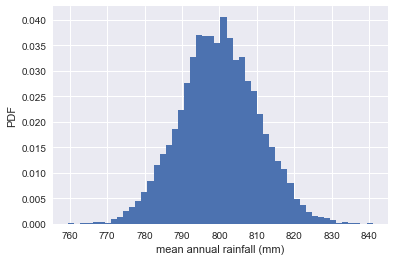

In [79]:
# make a histogram of the results
plt.hist(bs_replicates, bins = 50, normed = True)
plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('PDF')
plt.show()

In [80]:
#confidence interval 95%
np.percentile(bs_replicates, [2.5, 97.5])

array([779.6043985 , 819.96992481])

### Bootstrap replicates of other statistics


/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


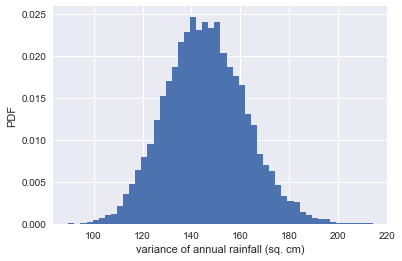

In [81]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# not normally distributed, as it has a longer tail to the right

## Pairs bootstrap
### Nonparametric inference
- make no assumptions about the model or probability distribution underlying the data
- OLS used a linnear model with 2 parameters
    - the optimal values computed would be different if they were computed with different data

### Pairs bootstrap for linear regression
- resample data *in pairs*
- boostrap sampel consists of a set of (x,y) pairs
- Each slope and intercept is a bootstrap replicate
- Compute confidence intervals from percentiles of bootstrap replicates

### Generating a pairs bootstrap sample
- sample the indices of the data with replacement

In [82]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [83]:
df_swing = pd.read_csv('https://raw.githubusercontent.com/johnashu/datacamp/master/statistical-thinking-in-python-part-1/2008_swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [87]:
inds = np.arange(len(df_swing.total_votes))

bs_inds = np.random.choice(inds, len(inds))

bs_total_votes = df_swing.total_votes[bs_inds]
bs_dem_share = df_swing.dem_share[bs_inds]

bs_slope, bs_intercept = np.polyfit(bs_total_votes, bs_dem_share, 1)

print(bs_slope, bs_intercept)

np.polyfit(df_swing.total_votes, df_swing.dem_share, 1) # fit of original

4.948129770590855e-05 38.97987651630883


array([4.0370717e-05, 4.0113912e+01])

We can even plot all of these bootstrapped regression lines to see how the regression line might have changed if the data were "collected again."

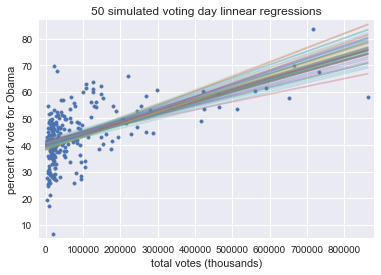

In [95]:
# Plot the illiteracy rate versus fertility
_ = plt.scatter(df_swing.total_votes, df_swing.dem_share, marker='.')#, linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

for i in range (50):
    # Perform a linear regression using np.polyfit(): a, b
    inds = np.arange(len(df_swing.total_votes))
    
    bs_inds = np.random.choice(inds, len(inds))
    
    bs_total_votes = df_swing.total_votes[bs_inds]
    bs_dem_share = df_swing.dem_share[bs_inds]
    
    bs_slope, bs_intercept = np.polyfit(bs_total_votes, bs_dem_share, 1)
    # Make theoretical line to plot
    x = np.array([0, np.max(df_swing.total_votes)])
    y = bs_slope * x + bs_intercept
    
    # Add regression line to your plot
    _ = plt.plot(x, y, alpha = 0.3)

# Draw the plot
plt.title('50 simulated voting day linnear regressions')
plt.show()

In [96]:
### A Function to do pairs bootstraps
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

### Pairs boostrap of literacy/ferticlity data

[0.04417398 0.05520518]


/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


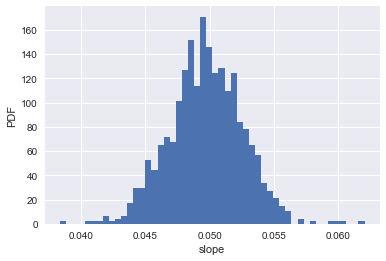

In [97]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

### Plotting bootstrap regressions
- visualize the variability "we might expect" in a linnera regression by plotting the line we would get from each bootstrap replicate of the slope and intercept. 
    - done for 100 boostrap replicates

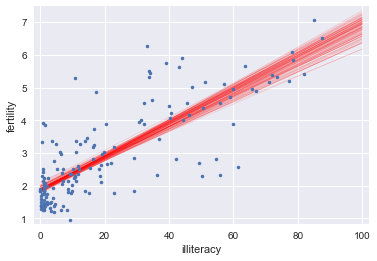

In [98]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Chp. 3 Formulating and simulating a hypothesis
How do we assess how reasonable our data described by the model is?
**Hypothesis testing**
- hypothesizing county level data distributions in similar states
- assessment of how "reasonable the observed data are assuming a hypothesis is true"

The hypothesis we're testing is the "null hypothesis"

- could just plot the ECDFS of the two counties
    - pensilvania
    - ohio
- but this visalization is does not make it easy to determine. 
    - PA lloks slightly more toward Obama in the middle part of the ECDFS but not by much

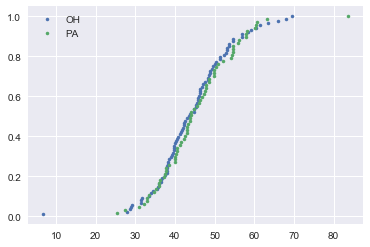

In [115]:
x,y = ecdf(df_swing.dem_share[df_swing.state == 'OH'])
plt.plot(x,y, marker = '.', linestyle = 'None')

x,y = ecdf(df_swing.dem_share[df_swing.state == 'PA'])
plt.plot(x,y, marker = '.', linestyle = 'None')
plt.legend(['OH', 'PA'])
plt.xlabel('ECDF')
plt.ylabel('percent vote for Obama')
plt.show()


We could compare some summary statistics but that doesn't help much either. Since the summary statistics are so similar. 

In [141]:
print('------ PA')
print('mean', round(df_swing.dem_share[df_swing.state == 'PA'].mean(), 2), '%')
print('median', round(df_swing.dem_share[df_swing.state == 'PA'].median(), 2), '%')
print('std', round(df_swing.dem_share[df_swing.state == 'PA'].std(), 2), '%')

------ PA
mean 45.48 %
median 44.03 %
std 9.8 %


In [142]:
print('------ OH')
print('mean', round(df_swing.dem_share[df_swing.state == 'OH'].mean(), 2), '%')
print('median', round(df_swing.dem_share[df_swing.state == 'OH'].median(), 2), '%')
print('std', round(df_swing.dem_share[df_swing.state == 'OH'].std(), 2), '%')

------ OH
mean 44.32 %
median 43.67 %
std 9.9 %


In [143]:
print('------ PA - OH difference')
print('mean', round(df_swing.dem_share[df_swing.state == 'PA'].mean() - df_swing.dem_share[df_swing.state == 'OH'].mean(), 2), '%')
print('median', round(df_swing.dem_share[df_swing.state == 'PA'].median() - df_swing.dem_share[df_swing.state == 'OH'].median(), 2), '%')
print('std', round(df_swing.dem_share[df_swing.state == 'PA'].std() - df_swing.dem_share[df_swing.state == 'OH'].std(), 2), '%')

------ PA - OH difference
mean 1.16 %
median 0.36 %
std -0.09 %


To resolve this issue, simulate what the data "would" look like if the county-level voting trends in the two states were identically distributed. 

## Simulating the Hypothesis
- We can do this by putting the dem share of the vote for both states together.
    - 67 for PA, the other 88 for OH
- We then shuffle them, and assign the first 67 to PA and the rest to OH
    - We just "redid" the election as if there were no difference between PA and OH

This technique is called **permutation** 
- random reordering of entries in an array

## Generating a permutation sample

In [145]:
dem_share_PA = df_swing.dem_share[df_swing.state == 'PA']
dem_share_OH = df_swing.dem_share[df_swing.state == 'OH']

#concatenate the two arrayws
dem_share_both = np.concatenate([dem_share_PA, dem_share_OH])

# "shuffle" the values
dem_share_perm = np.random.permutation(dem_share_both)

# assign the appropriately lengthed subsets to each permuted state
# permutation samples
perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

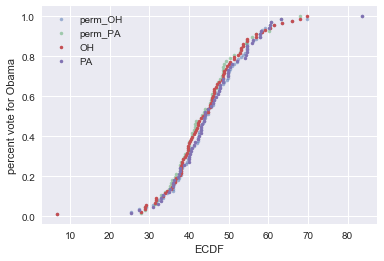

In [152]:
# compare the ECDFS of the permuted samples
x,y = ecdf(perm_sample_OH)
plt.plot(x,y, marker = '.', linestyle = 'None', alpha = .5)

x,y = ecdf(perm_sample_PA)
plt.plot(x,y, marker = '.', linestyle = 'None', alpha = .5)

x,y = ecdf(df_swing.dem_share[df_swing.state == 'OH'])
plt.plot(x,y, marker = '.', linestyle = 'None')

x,y = ecdf(df_swing.dem_share[df_swing.state == 'PA'])
plt.plot(x,y, marker = '.', linestyle = 'None')

plt.xlabel('ECDF')
plt.ylabel('percent vote for Obama')
plt.legend(['perm_OH', 'perm_PA', 'OH', 'PA'])
plt.show()

## Hypothesis testing
- testing the null hypothesis that the county-level voting is identically distributed between the two states.
- assesment of how reasonable the observed data are assuming a hypothesis is true
    - a bit vague:
    - what about the dzta do we asses and how do we quantify the assessment?
**test statistic**
- A single number that can be computed from observed data and from data you simulate under the null hypothesis
- serves as a basis of comparison between the two
    - so pick a metric that is relevant/pertinent to the question you are trying to answer.
        - i.e. are the two states different?
    - if they are identical they should have the same mean vote share for Obama. 
        - so use the difference of means as our test statistic

**permutation replicate** - the value of a test statistic computed from a permutation sample

In [153]:
# difference of the permuted samples
np.mean(perm_sample_PA) - np.mean(perm_sample_OH)
# about 1.03 %

-1.0316383989145166

In [154]:
# difference of the original data
np.mean(dem_share_PA) - np.mean(dem_share_OH)
# about 1.16 %

1.1582360922659518

Notice: the difference is quite small (about .12%). 
We can "redo" the election 10,000 times testing the hypothesis by generating lots and lots of permutations

In [146]:
def permutation_sample(data1, data2):
    '''Generate a permutation sample from two data sets'''
    # Concatenate the data sets:
    data = np.concatenate((data1, data2))
    # Permute the concatenated array:
    permuted_data = np.random.permutation(data)
    
    # split the permuted array into two appropriately lengthed samples
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

In [148]:
rain_july = [ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2]
rain_november = [ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8]

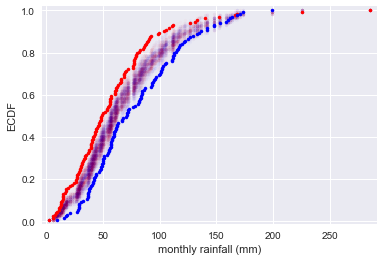

In [149]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(
                                    rain_july, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice 
1. the permutation samples' ECDFs overlap and give a purple haze. 
2. None of the ECDFs from the permutation samples overlap with the observed, data, suggesting that the hypothesis is not commensurate with the data. 
    - July and November rainfall are not identically distributed

## Test statistics and p-values
- after simulating the test hypothesis
- we can start to test the null hypothesis
- simulate the permutation many times (10,000) and look at histogram of the test statistic values.
    - compare it with the line that represents the test statistic of the original data
        - p-value will correspond to the area under the curve delimited by the original test statistic   

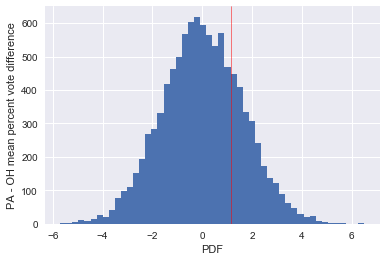

In [166]:
test_statistic = []
for i in range(10000):
    perm_sample_PA, perm_sample_OH = permutation_sample(dem_share_PA,
                                                       dem_share_OH)
    # difference of the permuted samples
    test_statistic.append(np.mean(perm_sample_PA) - np.mean(perm_sample_OH))

plt.hist(np.array(test_statistic), bins = 50)
plt.axvline(x = np.mean(dem_share_PA) - np.mean(dem_share_OH), 
            color = 'red', linewidth = .5)
plt.xlabel('PDF')
plt.ylabel('PA - OH mean percent vote difference')
plt.show()

In this case, about 23% of the "elections" had a least 1.16% difference or greater. 0.23 is the p-value

## p-value
- the probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true
    - the probability of getting at least 1.16% mean diffference 

So, is it plausible that we would observe the vote share we got if PA and OH had identically distributed county-level voting. 
- yes. 
- it happend 23% of the time under the null hypothesis

- NOT THE PROBABILITY THAT THE NULL HYPOTHESIS IS TRUE

- p-value only maningful if the null hypothesis is clearly stated, along with the tes stat used to evaluate it.
- when the p-val is small it is often said the data are statistically significantly different than what we would observe under the null hypotheis
- for this reason the hpothesis testing we're doing is sometimes called the null hypothesis significance testing, or NHST

remember: consider how different the data are from what you would expect from the null hypothesis
- statistical significance (low p-values)
- practical significance, whether or not the difference of the data from the null hypothesis matters for practical considerations, are two different things. 

statistical significance != practical significance

In [167]:
# generalize the above process into a function
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [178]:
ID = ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B']
impact_force = [1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468]

frogs_df = pd.DataFrame(ID, impact_force)
frogs_df.reset_index(inplace=True)
frogs_df.columns = ['impact_force', 'ID']
frogs_df.head()

,impact_force,ID
0,1.612,A
1,0.605,A
2,0.327,A
3,0.946,A
4,0.541,A


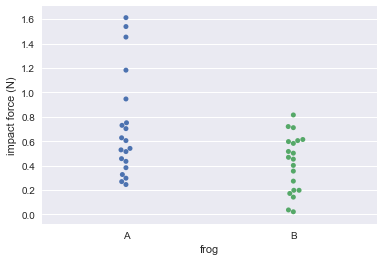

In [179]:
# swarm plot
sns.swarmplot(x = 'ID', y = 'impact_force', data = frogs_df)
plt.xlabel('frog')
plt.ylabel('impact force (N)')
plt.show()

The swarm plots look like the frogs have different data
- but since only 20 data points per frog is perhaps too little to notice the pattern, let's measure the distribution of each one

### Permutation test on frog data

In [180]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


In [182]:
force_a = frogs_df.impact_force[frogs_df.ID == 'A']
force_b = frogs_df.impact_force[frogs_df.ID == 'B']

In [186]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)
print('empirical diff of means', empirical_diff_means)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

#I'm pretty sure p will be the odds of getting a diff of means 
# of the permuted samples that is
# greater than or equal to the empirical difference

# i.e. odds of getting the empirical difference
# if two identical frogs were compared 20 * 10,000 times

# i.e. the chance that two identical frogs would produce these results
# if they were tested 200,000 times

# .4% chance

empirical diff of means 0.2882500000000002
p-value = 0.0042


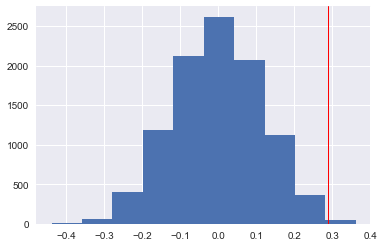

In [193]:
plt.hist(perm_replicates)
plt.axvline(x = empirical_diff_means, color = 'red', linewidth = '1')
plt.show()